[2024-09-02 13:51:14,016][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='0050' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT stock_id, Close, Open, High, Low, Volume, Date FROM stock_price WHERE stock_id ='0050' ORDER BY Date DESC LIMIT 500;

[2024-09-02 13:51:14,100][log.log][INFO] Query execution time: 0.0312957763671875 seconds.


<Axes: xlabel='Date'>

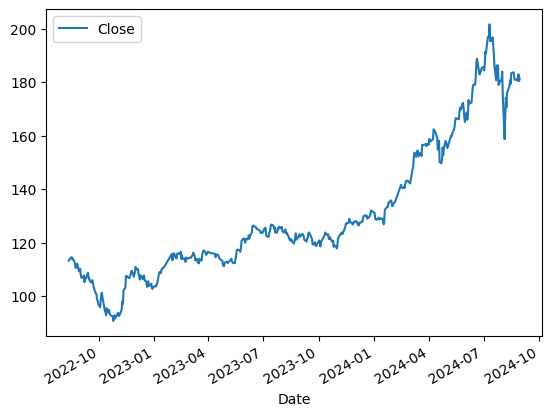

In [1]:
import pandas as pd
import numpy as np
import module_import
from src.quant_analysis.module_import import ETF_0050
df = ETF_0050()
df.plot()

In [2]:
base = 1
down = -0.1
N = 2

start = "2023-01-01"
end = "2024-03-01"

In [3]:
df = df.loc[start:end]

df['dr'] = df.pct_change(1)
df['r'] = df['dr'].add(1).cumprod()
df['dd'] = df['r'].div(df['r'].cummax()).sub(1)
df

/tmp/ipykernel_22416/2183384394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dr'] = df.pct_change(1)
/tmp/ipykernel_22416/2183384394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['r'] = df['dr'].add(1).cumprod()
/tmp/ipykernel_22416/2183384394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,Close,dr,r,dd
Date,,,,
2023-01-03,103.790,NaN,NaN,NaN
2023-01-04,103.555,-0.002264,0.997736,0.000000
2023-01-05,104.305,0.007243,1.004962,0.000000
2023-01-06,104.774,0.004496,1.009481,0.000000
2023-01-09,108.522,0.035772,1.045592,0.000000
...,...,...,...,...
2024-02-23,143.019,0.006651,1.377965,0.000000
2024-02-26,143.218,0.001391,1.379882,0.000000
2024-02-27,142.621,-0.004168,1.374130,-0.004168


## 打造金字塔部位

In [4]:
total_cost_list = []
unit_list = []
pre_NAV_list = [0]
TR_list = [0]
unit_add = 0

for i, price in enumerate(df["Close"]):
    if i == 0:
        unit = base
        total_cost = price * unit
        total_cost_list.append(total_cost)
        unit_list.append(unit)
    else:
        if df['dd'].iloc[i] < down*3 and df['dd'].iloc[i - 1] > down*3 and unit_add < N*3:
            unit = unit + N *3
            total_cost += N * 3 * price
            unit_add += N*3
        elif df['dd'].iloc[i] < down*2 and df['dd'].iloc[i - 1] > down*2 and unit_add < N*2:
            unit = unit + N *2
            total_cost += N * 2 * price
            unit_add += N*2
        elif df['dd'].iloc[i] < down and df['dd'].iloc[i - 1] > down and unit_add < N:
            unit = unit + N
            total_cost += N * price
            unit_add += N
        pre_NAV = unit_list[i - 1]*price
        TR = pre_NAV / total_cost_list[-1] - 1
        total_cost_list.append(total_cost)
        unit_list.append(unit)
        pre_NAV_list.append(pre_NAV)
        TR_list.append(TR)

df['total_cost'] = total_cost_list
df['unit'] = unit_list
df['pre_NAV'] = pre_NAV_list
df['total_return'] = TR_list

df

/tmp/ipykernel_22416/3391648196.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_cost'] = total_cost_list
/tmp/ipykernel_22416/3391648196.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unit'] = unit_list
/tmp/ipykernel_22416/3391648196.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,Close,dr,r,dd,total_cost,unit,pre_NAV,total_return
Date,,,,,,,,
2023-01-03,103.790,NaN,NaN,NaN,103.79,1,0.000,0.000000
2023-01-04,103.555,-0.002264,0.997736,0.000000,103.79,1,103.555,-0.002264
2023-01-05,104.305,0.007243,1.004962,0.000000,103.79,1,104.305,0.004962
2023-01-06,104.774,0.004496,1.009481,0.000000,103.79,1,104.774,0.009481
2023-01-09,108.522,0.035772,1.045592,0.000000,103.79,1,108.522,0.045592
...,...,...,...,...,...,...,...,...
2024-02-23,143.019,0.006651,1.377965,0.000000,103.79,1,143.019,0.377965
2024-02-26,143.218,0.001391,1.379882,0.000000,103.79,1,143.218,0.379882
2024-02-27,142.621,-0.004168,1.374130,-0.004168,103.79,1,142.621,0.374130


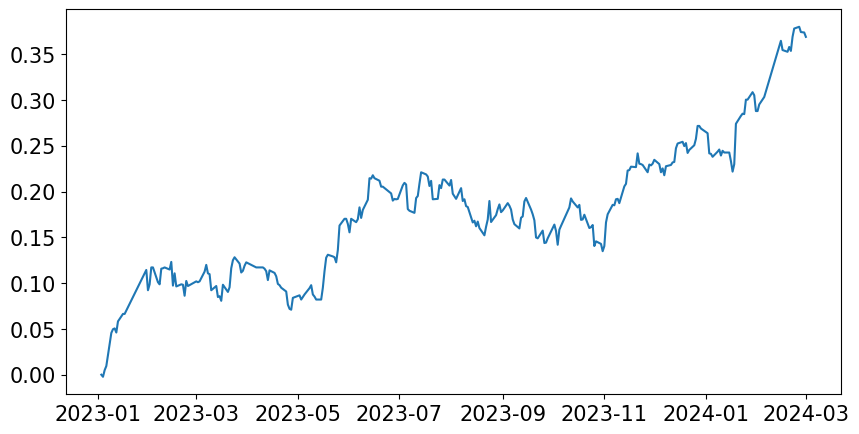

In [5]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df['total_return'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## 增加進場次數

In [6]:
total_cost_list=[]
unit_list=[]
pre_NAV_list=[0]
TR_list=[0]
unit_add=0
maxr=df['r'].iloc[1]

for i, price in enumerate(df['Close']):
    if i==0:
        unit = base
        total_cost = price * unit
        total_cost_list.append(total_cost)
        unit_list.append(unit)
    else:
        if df['r'].iloc[i]>maxr:
            maxr=df['r'].iloc[i]
            unit_add=0
        else:
            if df['dd'].iloc[i] < down*3 and df['dd'].iloc[i - 1] > down*3 and unit_add < N*3:
                unit = unit + N *3
                total_cost += N * 3 * price
                unit_add += N*3
            elif df['dd'].iloc[i] < down*2 and df['dd'].iloc[i - 1] > down*2 and unit_add < N*2:
                unit = unit + N *2
                total_cost += N * 2 * price
                unit_add += N*2
            elif df['dd'].iloc[i] < down and df['dd'].iloc[i - 1] > down and unit_add < N:
                unit = unit + N
                total_cost += N * price
                unit_add += N
        pre_NAV = unit_list[i - 1]*price
        TR = pre_NAV / total_cost_list[-1] - 1
        total_cost_list.append(total_cost)
        unit_list.append(unit)
        pre_NAV_list.append(pre_NAV)
        TR_list.append(TR)

df['total_cost'] = total_cost_list
df['unit'] = unit_list
df['pre_NAV'] = pre_NAV_list
df['total_return'] = TR_list
df

/tmp/ipykernel_22416/2296888097.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_cost'] = total_cost_list
/tmp/ipykernel_22416/2296888097.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['unit'] = unit_list
/tmp/ipykernel_22416/2296888097.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,Close,dr,r,dd,total_cost,unit,pre_NAV,total_return
Date,,,,,,,,
2023-01-03,103.790,NaN,NaN,NaN,103.79,1,0.000,0.000000
2023-01-04,103.555,-0.002264,0.997736,0.000000,103.79,1,103.555,-0.002264
2023-01-05,104.305,0.007243,1.004962,0.000000,103.79,1,104.305,0.004962
2023-01-06,104.774,0.004496,1.009481,0.000000,103.79,1,104.774,0.009481
2023-01-09,108.522,0.035772,1.045592,0.000000,103.79,1,108.522,0.045592
...,...,...,...,...,...,...,...,...
2024-02-23,143.019,0.006651,1.377965,0.000000,103.79,1,143.019,0.377965
2024-02-26,143.218,0.001391,1.379882,0.000000,103.79,1,143.218,0.379882
2024-02-27,142.621,-0.004168,1.374130,-0.004168,103.79,1,142.621,0.374130


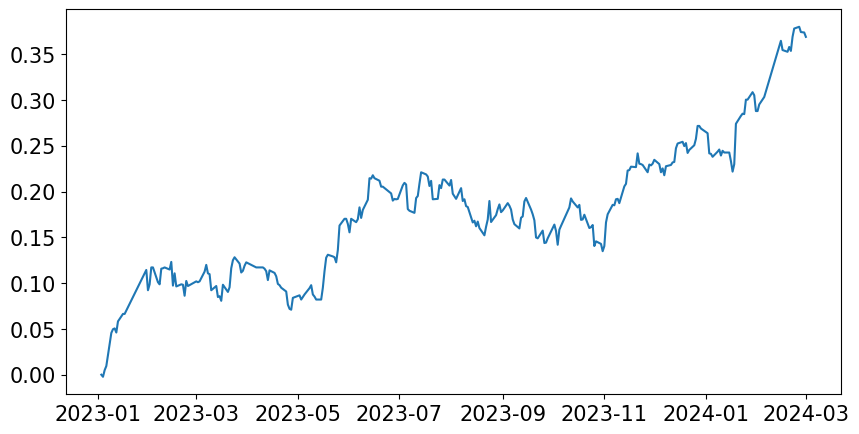

In [7]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df['total_return'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()